## Step-1: Importing Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Step-2 : Reading and Undertanding the Data

In [2]:
bikesharing=pd.read_csv("C:\\Users\\win\\Downloads\\day.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikesharing.shape

(730, 16)

In [4]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
#columns of data checking
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
#size of the data
bikesharing.size

11680

In [8]:
#checking datatypes
bikesharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
#checking the axes
bikesharing.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [10]:
#checking axes of the data
bikesharing.ndim

2

In [11]:
#checking the values of the data
bikesharing.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## Step-3: Cleaning the Data

In [12]:
bikesharing['days_old'] = (pd.to_datetime(bikesharing['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days


In [13]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [14]:
#Dropping some column like instant column because it is just an index column
bikesharing.drop(['instant'], axis = 1, inplace = True)
#Dropping dteday because year(yr),month(mnth), weekday columns are available
bikesharing.drop(['dteday'], axis = 1, inplace = True)

#Drpping casual and registered both of the column as cnt is there which is sum of casual and registered column
bikesharing.drop(['casual'], axis = 1, inplace = True)

bikesharing.drop(['registered'], axis = 1, inplace = True)

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [15]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [16]:
bikesharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
bikesharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [18]:
bikesharing.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


## Step-4:Handling Missing values

In [19]:
bikesharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

In [20]:
# outliers
bikesharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [21]:
bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

<Figure size 1296x288 with 0 Axes>

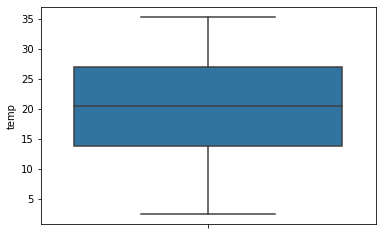

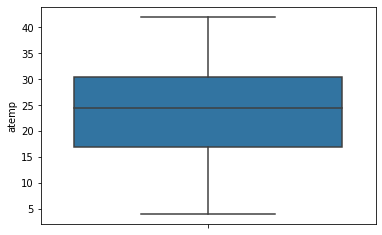

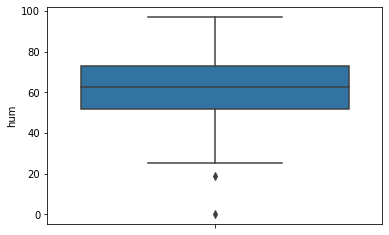

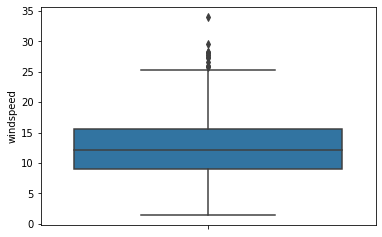

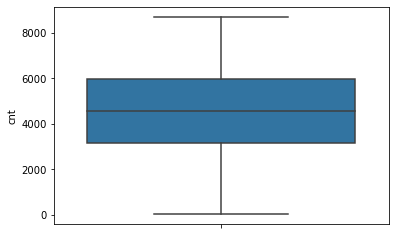

In [22]:
column= ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=(18,4))
for c in column:
    plt.show(c)
    sns.boxplot(y=c, data=bikesharing)

# Step-5:EDA- converting 

In [23]:
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing.mnth = bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bikesharing.weekday = bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

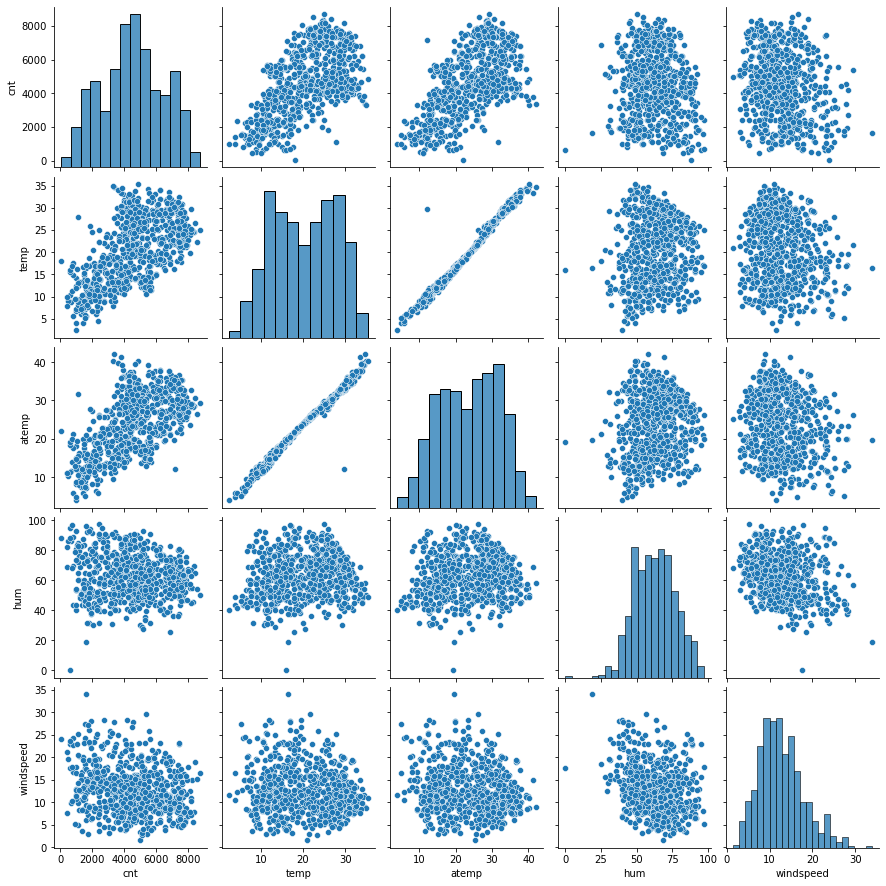

In [24]:
# Pairplots
plt.figure(figsize = (15,30))
sns.pairplot(data=bikesharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<Figure size 1800x1440 with 0 Axes>

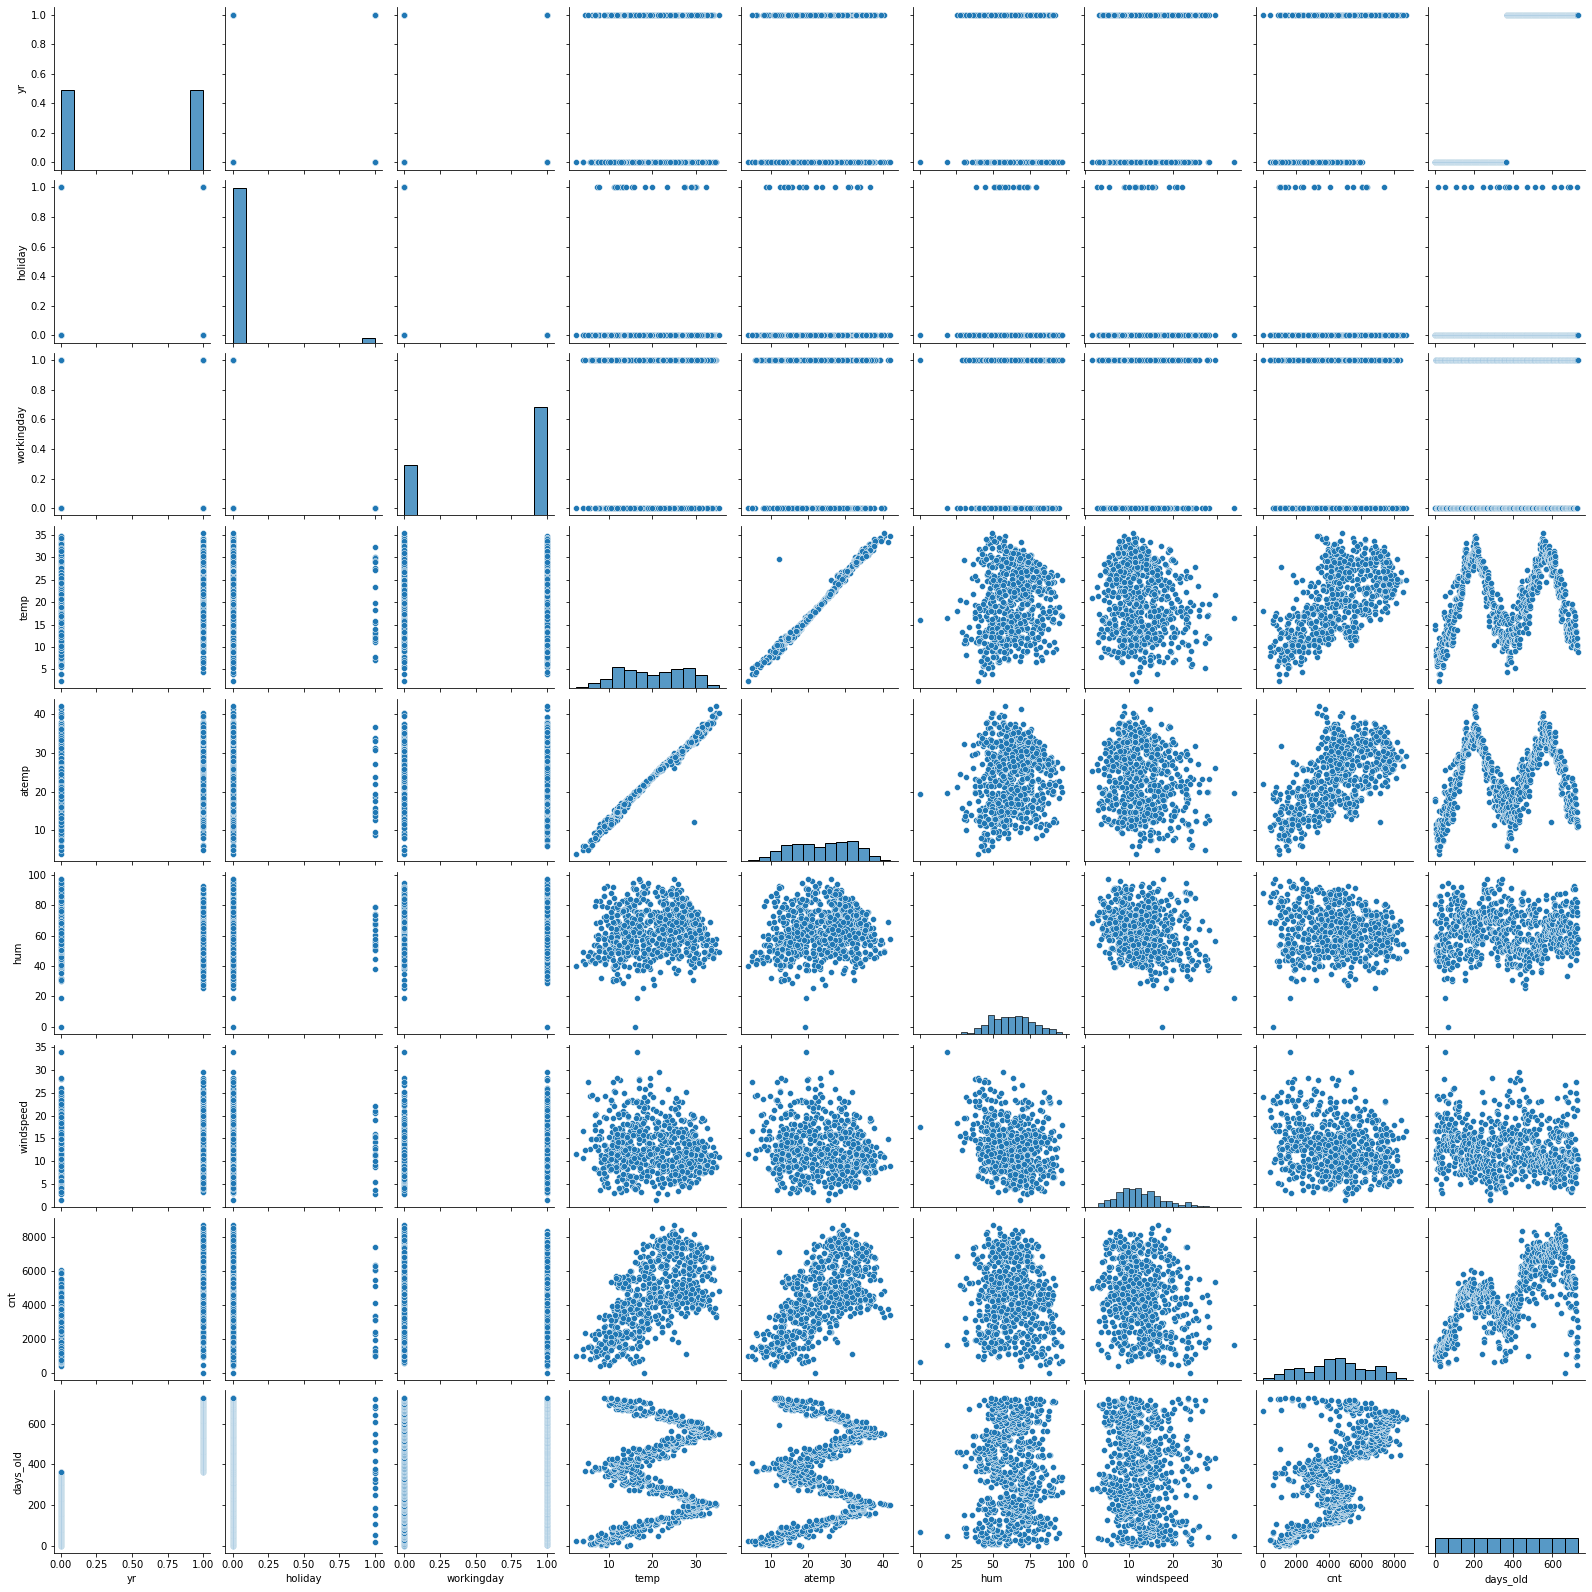

In [25]:
# Data to find the Correlation 
plt.figure(figsize=(25,20))
sns.pairplot(bikesharing)
plt.show()

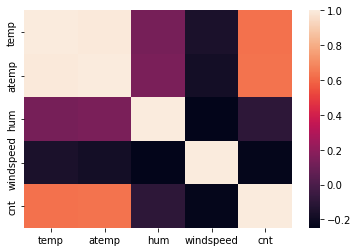

In [26]:
sns.heatmap(bikesharing[['temp','atemp','hum','windspeed','cnt']].corr())
plt.show()

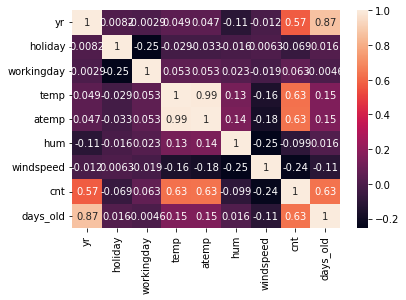

In [27]:
#Correlation for numeric variables
corr=bikesharing.corr()
sns.heatmap(corr,annot=True)
plt.show()

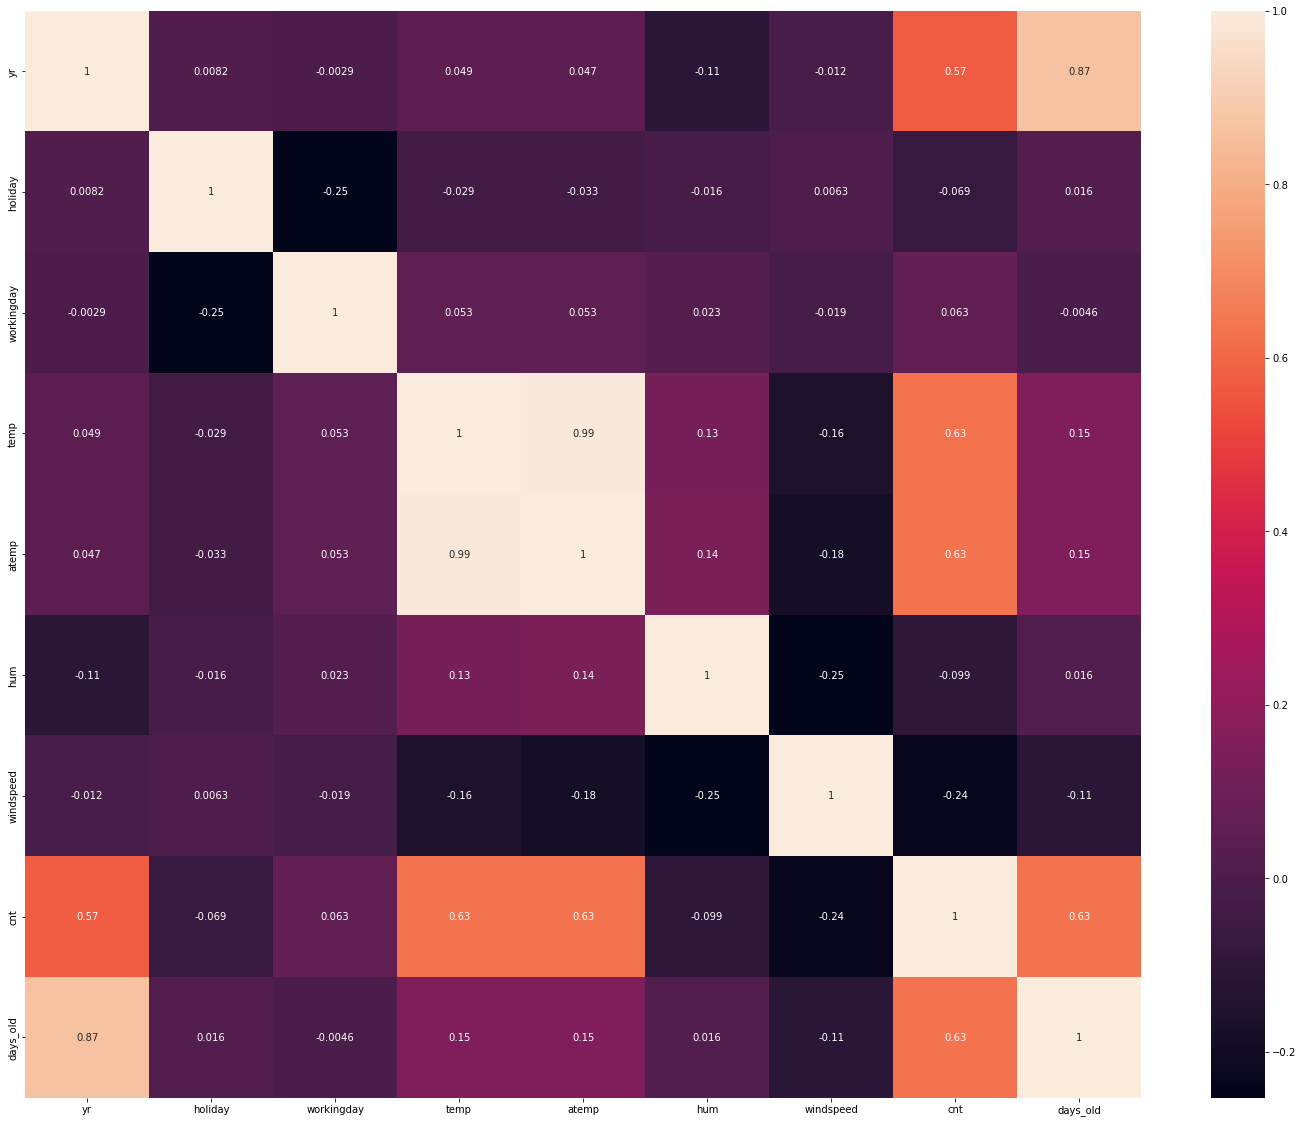

In [30]:
#Heatmap of correlation between variables
corr1 = bikesharing.corr()
plt.figure(figsize=(25,20))

sns.heatmap(corr,annot=True)
plt.show()

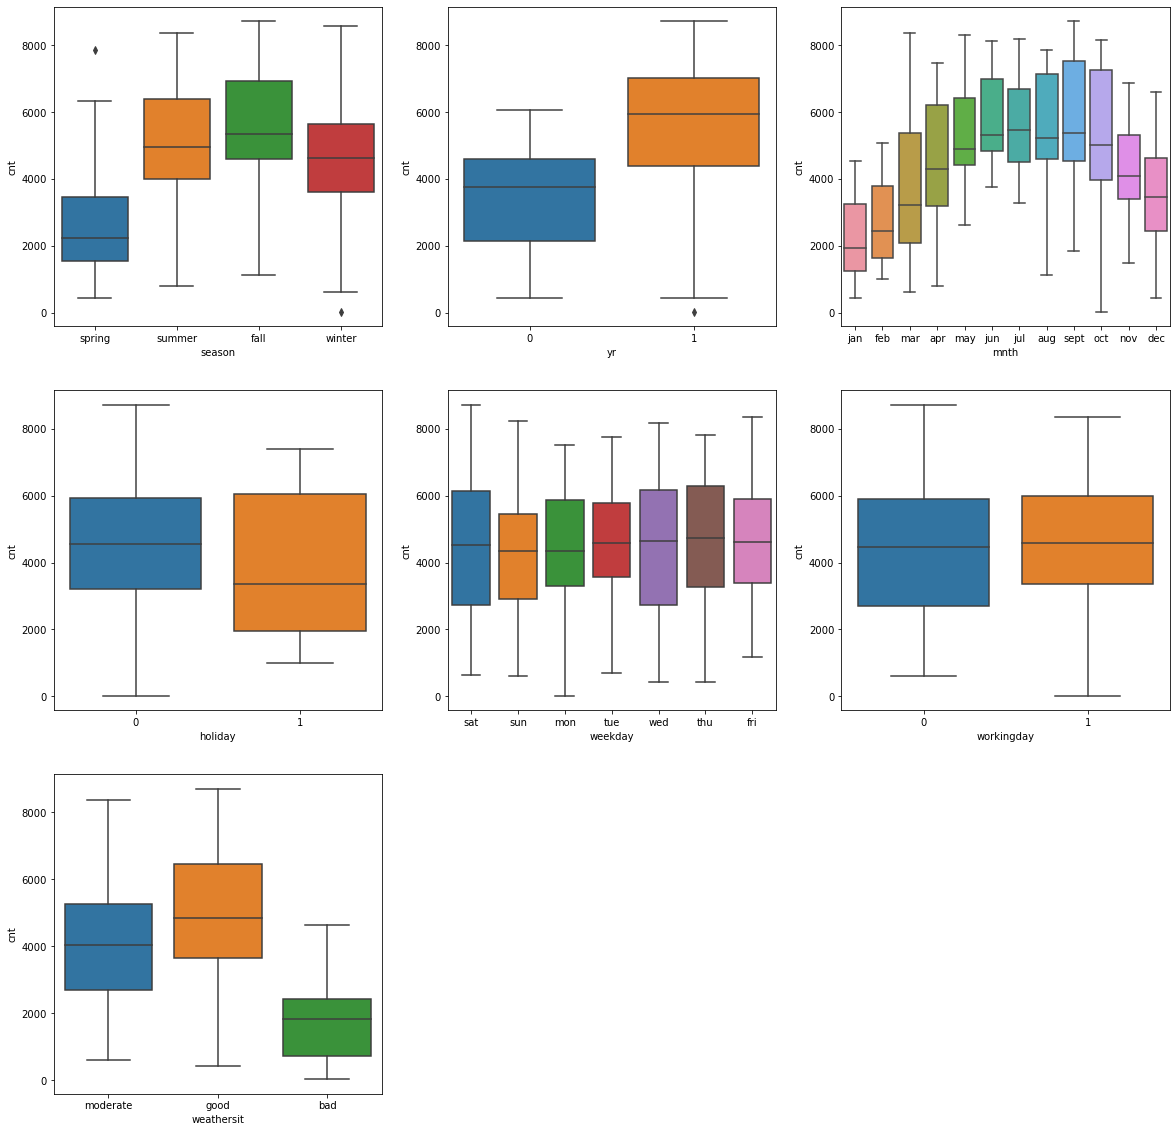

In [33]:
categ_var= ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(categ_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikesharing, x=i[1], y='cnt')
plt.show()

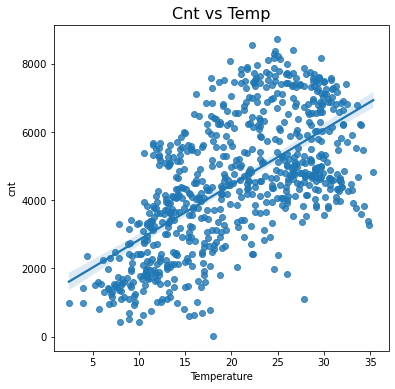

In [37]:
#cnt vs Temp
plt.figure(figsize=(6,6))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

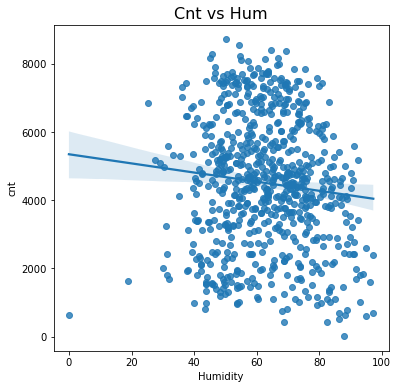

In [38]:
# cnt vs.Hum
plt.figure(figsize=(6,6))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

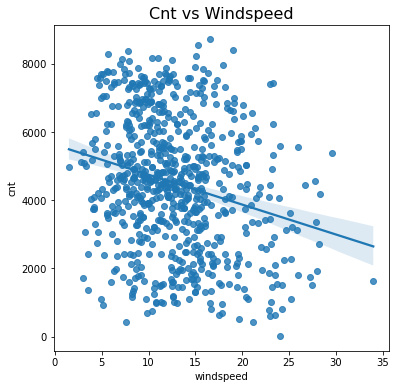

In [39]:
#cnt vs. Windspeed
plt.figure(figsize=(6,6))
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikesharing,y="cnt",x="windspeed")
plt.show()

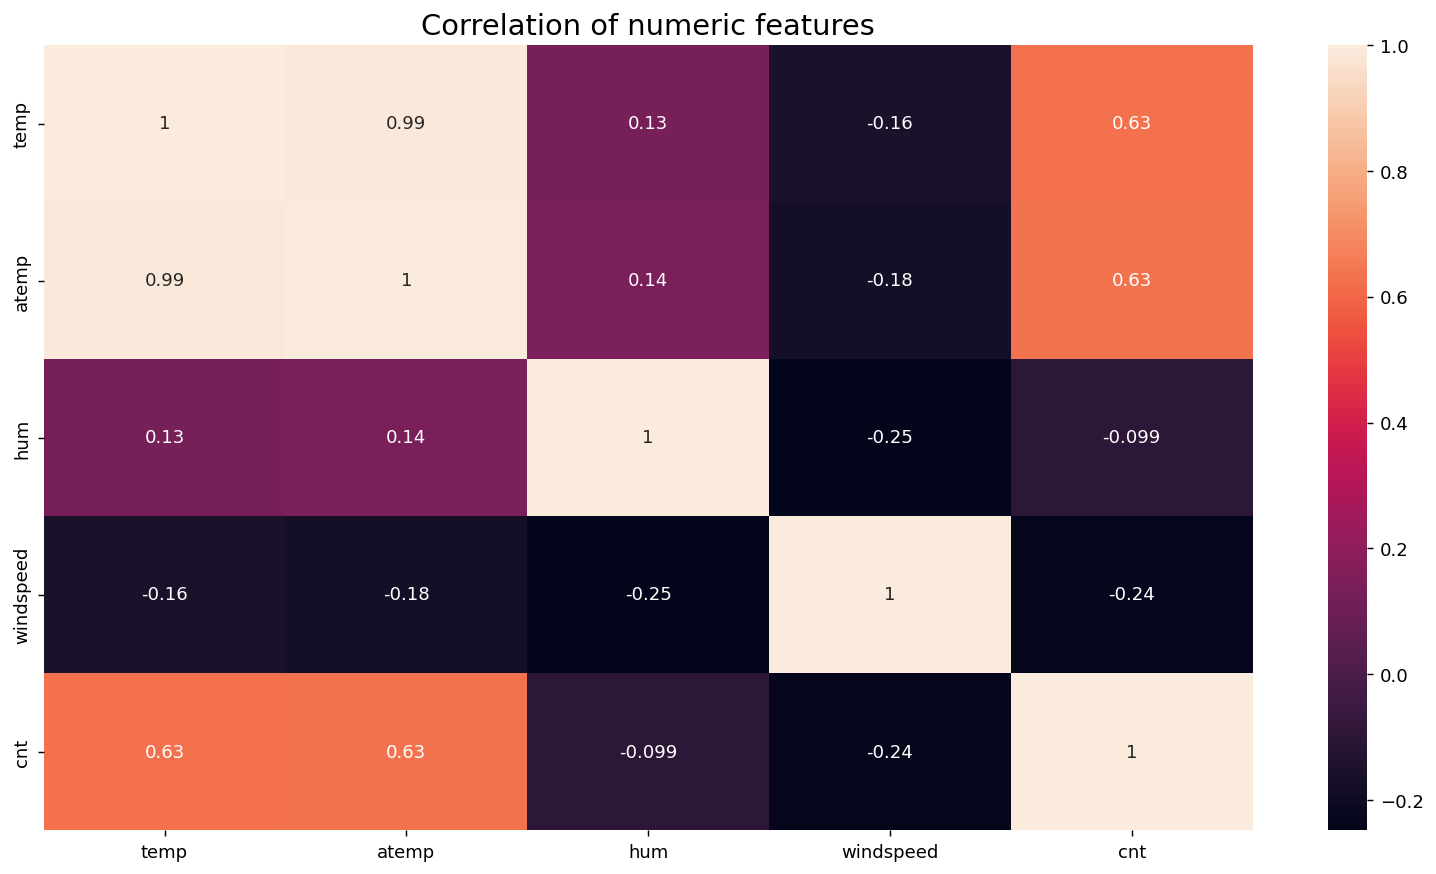

In [44]:
# heat map to check the numeric features of "cnt","Temp","Windspeed","atemp","Hum"
numeric_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikesharing[numeric_features].corr(),annot= True)
plt.show()

In [45]:
bikesharing.describe()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# Data Preparation
## Creating Dummy Variables for caterigorical variables

In [47]:
bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing ,columns=["weathersit"])

In [125]:
# columns after dummy variables creation
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [124]:
# rows
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


# Step-6: Model Building
## Split into training and test

In [51]:
# Shape before splitting
bikesharing.shape

(730, 32)

In [110]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bikesharing_train, bikesharing_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state=100)

In [111]:
bikesharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,653,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,576,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,426,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,728,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,482,0,1,...,0,0,1,0,0,0,0,0,0,1


In [112]:
print(bikesharing_test.shape)

(219, 31)


In [113]:
bikesharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,29.793347,33.27085,63.7917,5.459106,184,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,535,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,299,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,221,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,152,0,1,...,0,0,0,0,1,0,0,0,1,0


In [117]:
bikesharing_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [115]:
# Feature Scaling
#scale the numerical variables
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [118]:
num_var=['atemp','hum','windspeed']
bikesharing_train[num_var] = scaler.fit_transform(bikesharing_train[num_var])

In [120]:
bikesharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,0.501133,0.575354,0.300794,653,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,0.766351,0.725633,0.264686,576,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,0.438975,0.640189,0.255342,426,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.200348,0.498067,0.663106,728,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,0.391735,0.504508,0.188475,482,0,1,...,0,0,1,0,0,0,0,0,0,1


In [121]:
bikesharing_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.102429,0.512989,0.650369,0.320768,367.941176,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.627451,0.343137
std,0.500429,0.157763,0.468282,7.431169,0.212385,0.145882,0.169797,209.868619,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.483958,0.475223
min,0.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,0.332086,0.538643,0.199179,186.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,0.526811,0.653714,0.296763,372.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,0.688457,0.754830,0.414447,552.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,728.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
#creating X and Y
y_train = bikesharing_train.pop('atemp')
X_train = bikesharing_train

In [127]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,0.575354,0.300794,653,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,0.725633,0.264686,576,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,0.640189,0.255342,426,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.498067,0.663106,728,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,0.504508,0.188475,482,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [128]:
y_train.head()

653    0.501133
576    0.766351
426    0.438975
728    0.200348
482    0.391735
Name: atemp, dtype: float64

In [129]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [131]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [132]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', False, 12),
 ('holiday', True, 1),
 ('workingday', False, 14),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 16),
 ('season_spring', False, 5),
 ('season_summer', False, 3),
 ('season_winter', False, 4),
 ('mnth_aug', True, 1),
 ('mnth_dec', False, 15),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 9),
 ('mnth_jul', True, 1),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 8),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 13),
 ('mnth_oct', False, 10),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', True, 1),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 2),
 ('weathersit_bad', True, 1),
 ('weathersit_good', False, 6),
 ('weathersit_moderate', False, 7)]

In [133]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'temp', 'hum', 'windspeed', 'mnth_aug', 'mnth_jul',
       'mnth_jun', 'mnth_may', 'mnth_sept', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weathersit_bad'],
      dtype='object')

In [134]:
X_train.columns[~rfe.support_]

Index(['yr', 'workingday', 'days_old', 'season_spring', 'season_summer',
       'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_mar',
       'mnth_nov', 'mnth_oct', 'weekday_wed', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [135]:
X_train_rfe = X_train[col]

# Build a model using Statmodel

In [139]:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [140]:
lm = sm.OLS(y_train,X_train_rfe1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1793.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:38:56   Log-Likelihood:                 1090.9
No. Observations:                 510   AIC:                            -2150.
Df Residuals:                     494   BIC:                            -2082.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0678      0.009     -7.

# Build a model using RFE

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,11.15
2,windspeed,3.93
3,mnth_aug,1.96
4,mnth_jul,1.87
5,mnth_jun,1.64
7,mnth_sept,1.56
8,weekday_mon,1.55
6,mnth_may,1.47
9,weekday_sat,1.46
10,weekday_sun,1.43


In [142]:
X_train_rfe1.head()

,const,holiday,temp,hum,windspeed,mnth_aug,mnth_jul,mnth_jun,mnth_may,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weathersit_bad
653,1.0,0,19.201653,0.575354,0.300794,0,0,0,0,0,0,0,0,0,1,0
576,1.0,0,29.246653,0.725633,0.264686,0,1,0,0,0,0,0,0,0,1,0
426,1.0,0,16.980847,0.640189,0.255342,0,0,0,0,0,0,1,0,0,0,0
728,1.0,0,10.489153,0.498067,0.663106,0,0,0,0,0,0,0,1,0,0,0
482,1.0,0,15.443347,0.504508,0.188475,0,0,0,0,0,0,1,0,0,0,0


In [143]:
#  Dropping column "hum" as it has a very high VIF 
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [144]:
import statsmodels.api as sm  
X_train_rfe1 = sm.add_constant(X_train_rfe)

In [145]:
lm1 = sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1921.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        21:41:30   Log-Likelihood:                 1090.4
No. Observations:                 510   AIC:                            -2151.
Df Residuals:                     495   BIC:                            -2087.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0620      0.006     -9.

In [157]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weekday_mon,1.20
0,holiday,1.13
1,mnth_aug,1.09
2,mnth_jul,1.09
7,weekday_sat,1.09
9,weekday_thu,1.09
10,weekday_tue,1.09
4,mnth_may,1.08
5,mnth_sept,1.08
8,weekday_sun,1.08


In [149]:
#  Dropping column "temp it has a very high VIF 
X_train_rfe=X_train_rfe.drop(['temp'],axis=1)

In [150]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     80.96
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.62e-113
Time:                        21:43:38   Log-Likelihood:                 357.31
No. Observations:                 510   AIC:                            -686.6
Df Residuals:                     496   BIC:                            -627.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3841      0.016     24.

In [151]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,2.46
7,weekday_mon,1.41
8,weekday_sat,1.35
9,weekday_sun,1.30
11,weekday_tue,1.29
10,weekday_thu,1.28
0,holiday,1.13
2,mnth_aug,1.10
5,mnth_may,1.10
3,mnth_jul,1.09


In [152]:
X_train_rfe.columns

Index(['holiday', 'windspeed', 'mnth_aug', 'mnth_jul', 'mnth_jun', 'mnth_may',
       'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weathersit_bad'],
      dtype='object')

In [153]:
#  Dropping column "windspeed" as it has a very high VIF 
X_train_rfe=X_train_rfe.drop(['windspeed'],axis=1)

In [155]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     87.27
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.46e-114
Time:                        21:46:04   Log-Likelihood:                 356.10
No. Observations:                 510   AIC:                            -686.2
Df Residuals:                     497   BIC:                            -631.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3668      0.011     32.

In [159]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weekday_mon,1.20
0,holiday,1.13
1,mnth_aug,1.09
2,mnth_jul,1.09
7,weekday_sat,1.09
9,weekday_thu,1.09
10,weekday_tue,1.09
4,mnth_may,1.08
5,mnth_sept,1.08
8,weekday_sun,1.08


In [162]:
X_train_rfe6 = sm.add_constant(X_train_rfe)
lm6 = sm.OLS(y_train,X_train_rfe6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     87.27
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.46e-114
Time:                        21:49:55   Log-Likelihood:                 356.10
No. Observations:                 510   AIC:                            -686.2
Df Residuals:                     497   BIC:                            -631.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3668      0.011     32.

In [165]:
X_train_rfe['workingday']=X_train['workingday']
X_train_rfe.head()

,holiday,mnth_aug,mnth_jul,mnth_jun,mnth_may,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weathersit_bad,workingday
653,0,0,0,0,0,0,0,0,0,0,1,0,1
576,0,0,1,0,0,0,0,0,0,0,1,0,1
426,0,0,0,0,0,0,0,1,0,0,0,0,0
728,0,0,0,0,0,0,0,0,1,0,0,0,0
482,0,0,0,0,0,0,0,1,0,0,0,0,0


In [166]:
X_train_rfe9 = sm.add_constant(X_train_rfe)
lm9 = sm.OLS(y_train,X_train_rfe9).fit()
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     87.27
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.46e-114
Time:                        21:51:39   Log-Likelihood:                 356.10
No. Observations:                 510   AIC:                            -686.2
Df Residuals:                     497   BIC:                            -631.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2925      0.010     30.

In [169]:

X_train_rfe=X_train_rfe.drop(['weekday_mon'],axis=1)

In [170]:
X_train_rfe20 = sm.add_constant(X_train_rfe)
lm20 = sm.OLS(y_train,X_train_rfe20).fit()
print(lm20.summary())

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     95.34
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.92e-115
Time:                        22:03:39   Log-Likelihood:                 356.01
No. Observations:                 510   AIC:                            -688.0
Df Residuals:                     498   BIC:                            -637.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2942      0.009     34.

In [171]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,workingday,2.20
9,weekday_tue,1.15
8,weekday_thu,1.13
6,weekday_sat,1.11
7,weekday_sun,1.09
1,mnth_aug,1.06
4,mnth_may,1.06
2,mnth_jul,1.05
3,mnth_jun,1.05
5,mnth_sept,1.05


In [173]:
#elimination
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# Model Building

In [177]:
#all the variables selected by RFE
column = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1741.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:03   Log-Likelihood:                 1083.6
No. Observations:                 510   AIC:                            -2135.
Df Residuals:                     494   BIC:                            -2067.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0769    

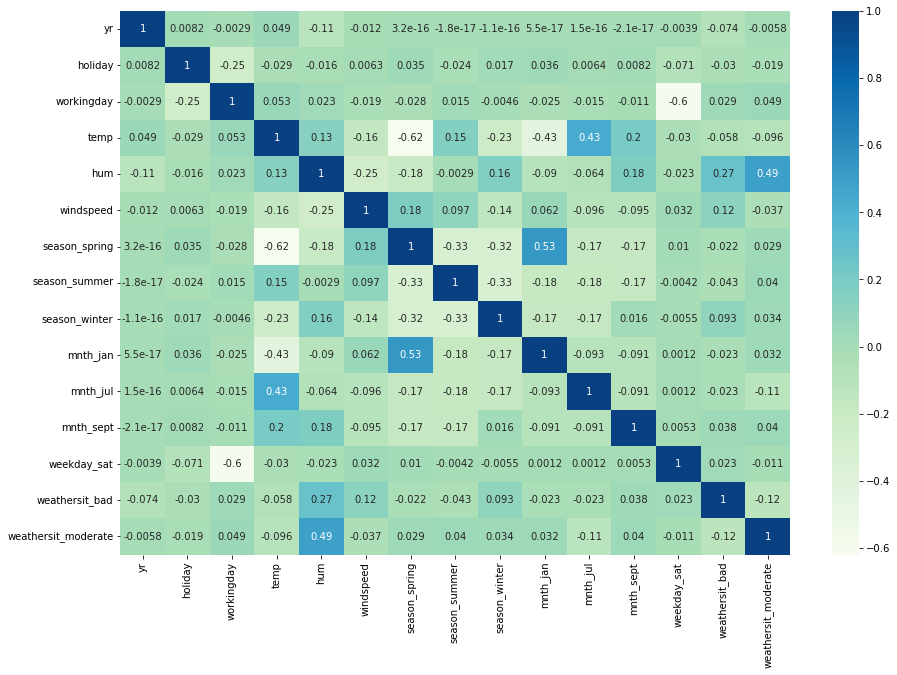

In [178]:
# checking correlation of features selected by RFE with Target column
plt.figure(figsize = (15,10))
sns.heatmap(bikesharing[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## Model-2

In [179]:
column= ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1867.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:07   Log-Likelihood:                 1083.3
No. Observations:                 510   AIC:                            -2137.
Df Residuals:                     495   BIC:                            -2073.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0786    

## Model-3
#### All the columns have p-value> 0.5


In [180]:
column= ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:09   Log-Likelihood:                 1082.7
No. Observations:                 510   AIC:                            -2137.
Df Residuals:                     496   BIC:                            -2078.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0721    

# Model-4

In [181]:
# Dropping the variable hiliday as it has negative coefficient
column = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:12   Log-Likelihood:                 1082.3
No. Observations:                 510   AIC:                            -2139.
Df Residuals:                     497   BIC:                            -2083.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0733    

# Model-5

In [182]:
# Dropping the variable mnth_jul as it has negative coefficient
column= ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     2370.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:14   Log-Likelihood:                 1081.1
No. Observations:                 510   AIC:                            -2138.
Df Residuals:                     498   BIC:                            -2087.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0719    

# Model-6

In [183]:
#Dropping the variable temp as it has negative coefficient
column= ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          5.19e-114
Time:                        22:19:15   Log-Likelihood:                 351.35
No. Observations:                 510   AIC:                            -680.7
Df Residuals:                     499   BIC:                            -634.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7712    

# Model-7

In [184]:
# Replacing the July with spring because both are highly correlated
column= ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     25.22
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.03e-38
Time:                        22:19:17   Log-Likelihood:                 171.34
No. Observations:                 510   AIC:                            -320.7
Df Residuals:                     499   BIC:                            -274.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.4941    

# Model-8

In [185]:
#removing windspeed with spring because windspeed was highly correlated with temp
column= ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     104.1
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.54e-115
Time:                        22:19:18   Log-Likelihood:                 354.46
No. Observations:                 510   AIC:                            -686.9
Df Residuals:                     499   BIC:                            -640.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7156    

# Model-9

In [186]:
# using weekend "Sunday" which has been dropped instead of "Saturday"
column= ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(column)
get_vif(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     104.2
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          2.39e-115
Time:                        22:19:19   Log-Likelihood:                 354.52
No. Observations:                 510   AIC:                            -687.0
Df Residuals:                     499   BIC:                            -640.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7087    

# Model - 10

In [187]:
# adding "temp" and removing "season_summer" and "workingday"
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2688.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:19:20   Log-Likelihood:                 1061.4
No. Observations:                 510   AIC:                            -2103.
Df Residuals:                     500   BIC:                            -2060.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0593    

In [188]:
#Build a model with all the columns
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [189]:
column= ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lr = build_model_sk(X_train[column],y_train)
print(lr.intercept_,lr.coef_)

-0.05925162298967113 [-0.001097   -0.00135728 -0.00063435  0.01031347  0.00031836  0.00119382
 -0.01362513  0.00071556  0.02838298]


# Model Evaluation

#### Residucal Analysis

In [190]:
y_train_pred = lr.predict(X_train[column])

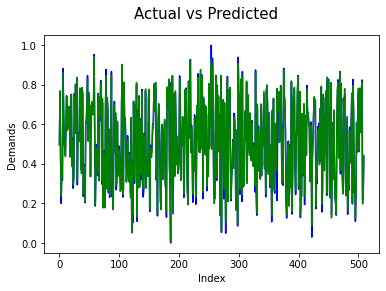

In [191]:
# Actual vs. Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="green")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

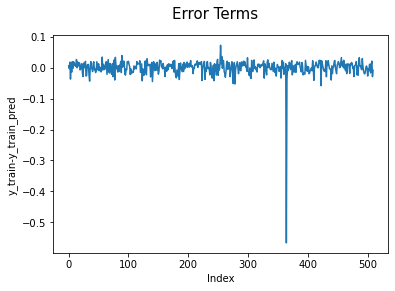

In [192]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [193]:
# R-squared value
r2_score(y_train,y_train_pred)

0.9797482969717402

#### linearity check

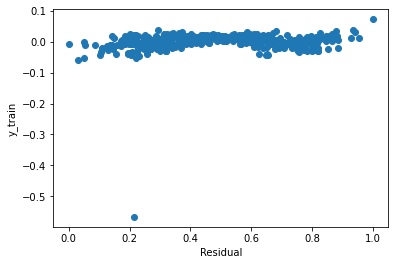

In [199]:
#scatter plot
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Predict values for test data set

In [213]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   days_old             730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

In [218]:
column= ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']
y_test_pred = lr.predict(X_test[column])

In [219]:
r2_score(y_test,y_test_pred)

-1.9311885602003573

# Homoscedacity

Text(0.5, 0, 'y_test')

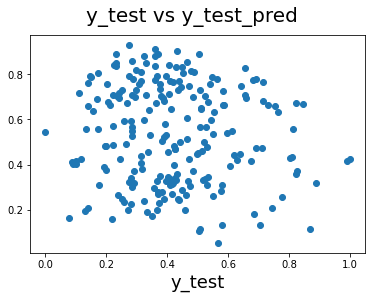

In [221]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.xlabel('y_test', fontsize = 18)                          

In [222]:
# Plot test vs Predicted test values
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              

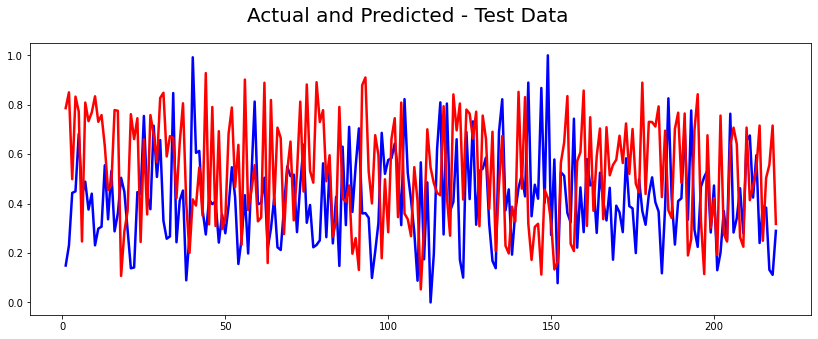

In [223]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [224]:
# Error terms ploting
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)  

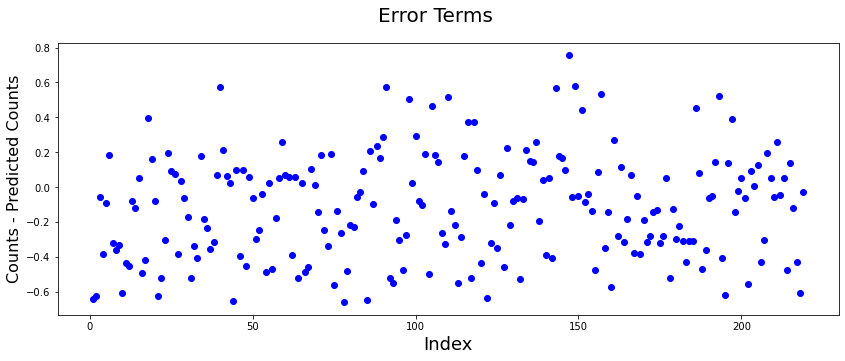

In [225]:
plot_err_terms(y_test,y_test_pred)

# Making Predictions

In [226]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,1,0,1,0


In [227]:
# Intrepretting the Model
column= ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(column)

                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2688.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:29:35   Log-Likelihood:                 1061.4
No. Observations:                 510   AIC:                            -2103.
Df Residuals:                     500   BIC:                            -2060.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0593    

In [228]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [229]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

0.3213229117950919

In [230]:
#Calculate the r square for test

r_squared = r2_score(y_test,y_test_pred)
r_squared

-1.9311885602003573

In [235]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,days_old,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,0.575354,0.300794,653,0,0,1,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,0.725633,0.264686,576,0,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,0.640189,0.255342,426,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,0.498067,0.663106,728,1,0,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,0.504508,0.188475,482,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [237]:
print(X_train.columns)
print(lm1.summary())

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  atemp   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     1921.
Date:                Wed, 10 Aug 2022   Prob (F-statistic):               0.00
Time:                        22:34:29   Log-Likelihood:                 1090.4
No. Observations:                 510   AIC:     